<h3 style="color:red;">Preterm neonate of 25+5 weeks of gestation and 0.826 kg with different sizes of the ductus arteriosus </h3>


In [1]:
# as this notebook is run from a subfolder, we need to change the working directory to the root folder
import os

if os.getcwd().split("/")[-1] != "explain-python":
    os.chdir("..")

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine

# instantiate a model engine instance with the 'baseline_neonate' model definition
model = ModelEngine("definitions/baseline_neonate.json")

# report the gas pressures in kPa
model.set_pressure_unit("kpa")

# get a reference to all the submodels
models = model.models

# instantiate a custom interface object especially designed to interact with the neonatal model engine instance
from interfaces.NeoInterface import NeoInterface

neo = NeoInterface(model)

# enable or disable the physiological submodels which can be enabled or disabled.
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(False)

# enable or disable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.resuscitation(False)

# stabilize the model by calculating 60 seconds
neo.calculate(60)

 Model 'baseline neonate' loaded and initialized correctly.
 Ready in 3.6 sec. Average model step in 0.0298 ms.


<h5>Scale the baseline patient to a premature born neonate of 25+5 weeks and 826 gram with a closed ductus arteriosus</h5>

Scaling baseline neonate with reference weight of 3.545 kg to weight 0.826 kg.

 Ready in 3.9 sec. Average model step in 0.0324 ms.

Scaled patient state with ductus arteriosus closed:


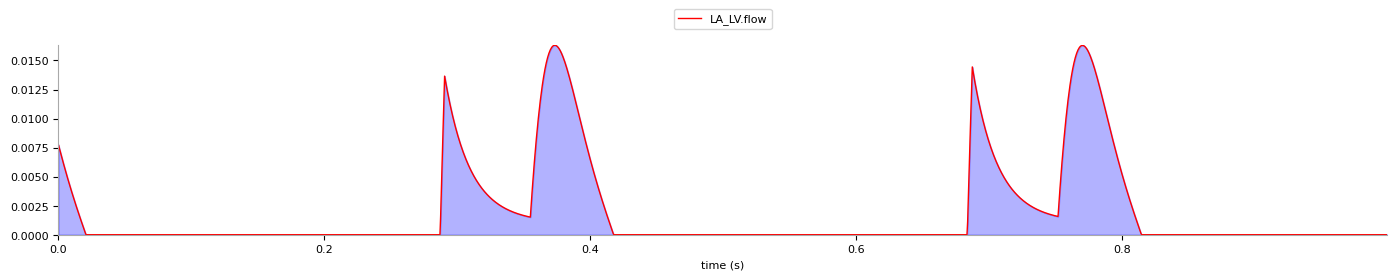


Scaled patient state with ductus arteriosus of 3.0 diameter and continuous left-right shunt:

 Ready in 3.6 sec. Average model step in 0.0302 ms.


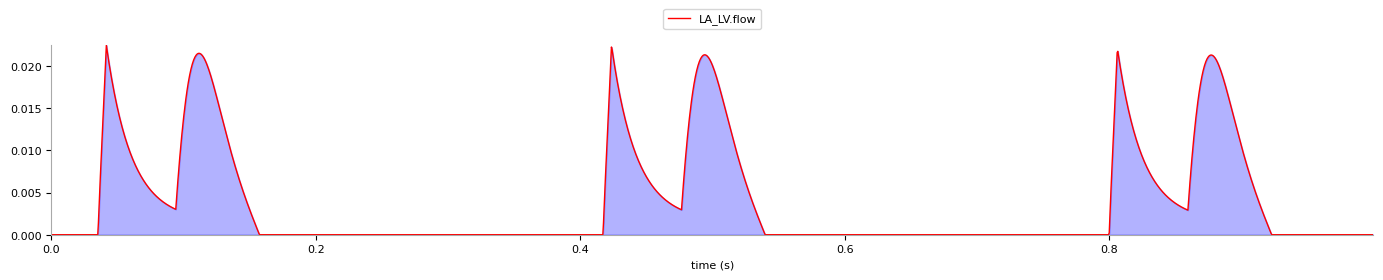

{'heartrate': 157.01306738458032,
 'spo2_pre': 96.80959416917536,
 'spo2_post': 96.16386095305238,
 'abp_systole': 45.55742,
 'abp_diastole': 24.53933,
 'abp_mean': 31.54536,
 'pap_systole': 40.51159,
 'pap_diastole': 23.46657,
 'pap_mean': 29.14824,
 'cvp': 2.940282135,
 'resp_rate': 41.80107247469284,
 'pH': 7.395477020107413,
 'po2': 10.567579557449216,
 'pco2': 5.717913565257708,
 'hco3': 25.977552601663124,
 'be': 0.6197543063967427}

In [2]:
neo.scale_patient_by_gestational_age("25wks_no_pda", output=False)
neo.calculate(60)
print("")
print("Scaled patient state with ductus arteriosus closed:")
neo.validate_pda()
neo.plot_time_graph(
    ["LA_LV.flow"],
    time_to_calculate=1.0,
    analyze=False,
    sampleinterval=0.0005,
)
print("")
print(
    "Scaled patient state with ductus arteriosus of 3.0 diameter and continuous left-right shunt:"
)
print()
model.models["Pda"].open_ductus(new_diameter=3.5, in_time=10.0, at_time=0.0)
neo.calculate(60)
neo.validate_pda()
neo.plot_time_graph(
    ["LA_LV.flow"],
    time_to_calculate=1.0,
    analyze=False,
    sampleinterval=0.0005,
)
neo.get_vitals()